### Problem Statement

You are a data scientist working on a classification problem to predict whether a hotel reservation will be canceled or not. You have been provided with a dataset named **`"hotel_reservations.csv"`**, which includes various attributes related to hotel bookings. The dataset comprises the following columns:

- `booking_id:` unique identifier of each booking
- `no_of_adults:` Number of adults
- `no_of_children:` Number of Children
- `no_of_weekend_nights:` Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
- `no_of_week_nights:` Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
- `type_of_meal_plan:` Type of meal plan booked by the customer
- `required_car_parking_space:` Does the customer require a car parking space? (0 - No, 1- Yes)
- `room_type_reserved:` Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels
- `lead_time:` Number of days between the date of booking and the arrival date
- `arrival_year:` Year of arrival date
- `arrival_month:` Month of arrival date
- `arrival_date:` Date of the month
- `market_segment_type:` Market segment designation
- `repeated_guest:` Is the customer a repeated guest? (0 - No, 1- Yes)
- `no_of_previous_cancellations:` Number of previous bookings that were canceled by the customer prior to the current booking
- `no_of_previous_bookings_not_canceled:` Number of previous bookings not canceled by the customer prior to the current booking
- `avg_price_per_room:` Average price per day of the reservation; prices of the rooms are dynamic (in euros)
- `no_of_special_requests:` Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
- `booking_status:` Flag indicating if the booking was canceled or not (Not_Canceled = 0, Canceled = 1)


You will perform data preprocessing, exploratory data analysis, and model training using different algorithms, including logistic regression, decision tree, random forest, and Naive Bayes. Additionally, you will implement k-fold cross-validation, stratified k-fold cross-validation, grid search, and randomized search techniques.

**Dataset Credits:** Ahsan Raza (https://www.kaggle.com/datasets/ahsan81/hotel-reservations-classification-dataset)

**Import Necessary Libraries**


In [1]:
# Import Necessary Libraries
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score,cross_validate
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

### Task 1: Data Preprocessing and EDA

1. Import the data from the `"hotel_reservations.csv"` file and store it in a variable df.
2. Display the number of rows and columns in the dataset.
3. Display the first few rows of the dataset to get an overview.
5. Remove the columns `booking_id, arrival_year, arrival_month, and arrival_date` as they do not add significant value to the predictive model.
6. Visualize the booking_status using a count plot.
7. Visualize the lead time for canceled and not canceled bookings using a box plot.
8. Visualize the average price per room for canceled and not canceled bookings using a box plot.
9. Encode categorical variables: type_of_meal_plan, room_type_reserved, and market_segment_type using one-hot encoding.

In [2]:
# Import the data from the "hotel_reservations.csv" file and store it in a variable df.
df = pd.read_csv("hotel_reservations.csv")

# Display the number of rows and columns in the dataset
print(df.shape)

# Display the first few rows of the dataset to get an overview
df.head()

(36275, 19)


,booking_id,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [3]:
# Remove the columns booking_id, arrival_year, arrival_month, and arrival_date
df.drop(columns = ['booking_id', 'arrival_year', 'arrival_month', 'arrival_date'],inplace =True)

<AxesSubplot:>

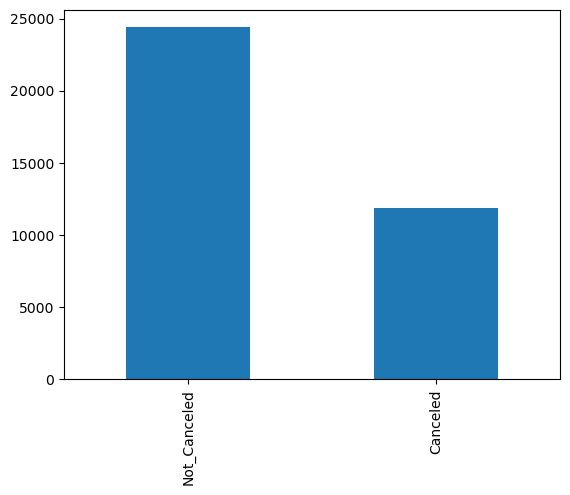

In [5]:
# Visualize the booking_status
df['booking_status'].value_counts().plot(kind = 'bar')

<AxesSubplot:xlabel='lead_time', ylabel='booking_status'>

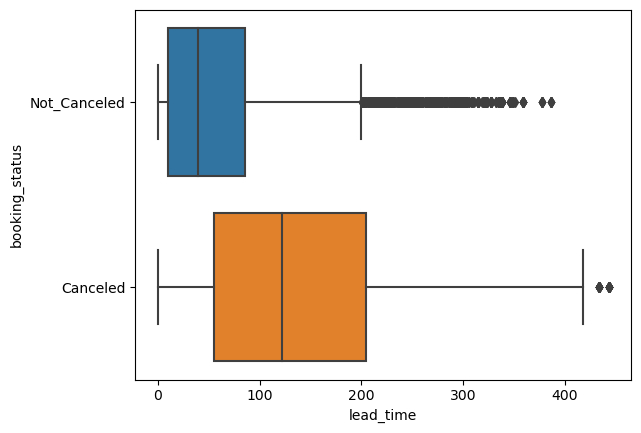

In [7]:
# Visualize the lead time for canceled and not canceled bookings using a box plot
sns.boxplot(data = df,x='lead_time', y='booking_status')

<AxesSubplot:xlabel='booking_status', ylabel='avg_price_per_room'>

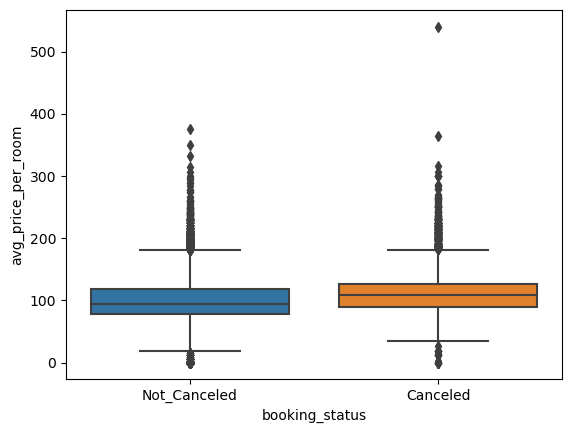

In [6]:
# Visualize the average price per room for canceled and not canceled bookings 
sns.boxplot(x='booking_status', y='avg_price_per_room', data=df)



In [8]:
# Encode categorical variables : type_of_meal_plan, room_type_reserved, and market_segment_type using one-hot encoding.

df = pd.get_dummies(df,columns = ['type_of_meal_plan', 'room_type_reserved', 'market_segment_type'],drop_first=True)

In [9]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,...,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
0,2,0,1,2,0,224,0,0,0,65.00,...,0,0,0,0,0,0,0,0,1,0
1,2,0,2,3,0,5,0,0,0,106.68,...,0,0,0,0,0,0,0,0,0,1
2,1,0,2,1,0,1,0,0,0,60.00,...,0,0,0,0,0,0,0,0,0,1
3,2,0,0,2,0,211,0,0,0,100.00,...,0,0,0,0,0,0,0,0,0,1
4,2,0,1,1,0,48,0,0,0,94.50,...,0,0,0,0,0,0,0,0,0,1


### Task 2: Feature Scaling

1. Standardize the numerical features `lead_time` and `avg_price_per_room`.
2. Define features (X) and target (y).

In [10]:
# Standardize the numerical features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['lead_time','avg_price_per_room']] = scaler.fit_transform(df[['lead_time','avg_price_per_room']])

# Define features(X) and target (y: booking_status)

X = df.drop('booking_status',axis = 1)
y = df['booking_status']

### Task 3: Implementing K-Fold Cross Validation

1. Initialize a KFold cross-validator with 7 splits.
2. Perform k-fold cross-validation using Naive Bayes and calculate the average accuracy.
3. Perform k-fold cross-validation using a Logistic Regression and calculate the average accuracy.
4. Perform k-fold cross-validation using a decision tree classifier and calculate the average accuracy.

In [11]:

# Initialize KFold with 7 splits.
kf = KFold(n_splits=7,shuffle=True, random_state=42)

# Cross validation with Naive Bayes
from sklearn.naive_bayes import GaussianNB
model_nb = GaussianNB()
nb_cv_score = cross_val_score(model_nb,X,y,cv = kf,scoring = 'accuracy')
print("Naive Bayes Cross-Validation Accuracy: ", nb_cv_score.mean())

# Cross validation with Logistic Regression
model_lr = LogisticRegression()
lr_cv_score = cross_val_score(model_lr,X,y,cv = kf,scoring = 'accuracy')
print("Logistic Regression Cross-Validation Accuracy: ", lr_cv_score.mean())
                              
# Cross validation with Decision Tree
model_dt = DecisionTreeClassifier()
dt_cv_score = cross_val_score(model_dt,X,y,cv = kf, scoring = 'accuracy')
print("Decision Tree Cross-Validation Accuracy: ", dt_cv_score.mean())

Naive Bayes Cross-Validation Accuracy:  0.4086008945293444
Logistic Regression Cross-Validation Accuracy:  0.8005512920818079
Decision Tree Cross-Validation Accuracy:  0.8589388325533263


### Task 4: Implementing Stratified K-Fold Cross Validation

1. Initialize a StratifiedKFold cross-validator with 7 splits
2. Perform stratified k-fold cross-validation using Naive Bayes and calculate the average accuracy.
3. Perform stratified k-fold cross-validation using a Logistic Regression and calculate the average accuracy.
4. Perform stratified k-fold cross-validation using a Decision Tree classifier and calculate the average accuracy.

In [13]:
# Initialize a StratifiedKFold cross-validator with 7 splits
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=7,shuffle=True, random_state=42)

# Perform stratified k-fold cross-validation using Naive Bayes
from sklearn.naive_bayes import GaussianNB
model_nb = GaussianNB()
nb_cv_score = cross_val_score(model_nb,X,y,cv = skf,scoring = 'accuracy')
print("Naive Bayes Cross-Validation Accuracy: ", nb_cv_score.mean())

# Perform stratified k-fold cross-validation using a Logistic Regression
model_lr = LogisticRegression()
lr_cv_score = cross_val_score(model_lr,X,y,cv = skf,scoring = 'accuracy')
print("Logistic Regression Cross-Validation Accuracy: ", lr_cv_score.mean())
                              
# Perform stratified k-fold cross-validation using a Decision Tree classifier

model_dt = DecisionTreeClassifier()
dt_cv_score = cross_val_score(model_dt,X,y,cv = skf, scoring = 'accuracy')
print("Decision Tree Cross-Validation Accuracy: ", dt_cv_score.mean())

Naive Bayes Cross-Validation Accuracy:  0.40862851035462067
Logistic Regression Cross-Validation Accuracy:  0.7999173195382144
Decision Tree Cross-Validation Accuracy:  0.8580288347299342


### Task 5: Implementing Grid Search CV

1. Initialize GridSearchCV with Naive Bayes and Random Forest:
    - Naive Bayes: var_smoothing [1e-9, 1e-8, 1e-7]
    - Random Forest: n_estimators [10, 50, 100], max_depth [5, 10, 15]
<br></br>
2. Fit GridSearchCV with Naive Bayes and Random Forest, and find the best parameters.
3. Print the best parameters for each model.

In [16]:
# Initialize GridSearchCV with Naive Bayes and Random Forest 

model_params = {
    'naive_bayes':{
        'model' : GaussianNB(),
        'params' : {
            'var_smoothing': [1e-9, 1e-8, 1e-7]
        }
    },
    'random_forest':{
        'model' : RandomForestClassifier(),
        'params' : {
            'n_estimators' : [10,50,100],
            'max_depth' : [5,10,15]
        }
    }
}



# Fit GridSearchCV with Naive Bayes and Random Forest, and find the best parameters.
scores = []
for key,val in model_params.items():
    clf = GridSearchCV(val['model'],val['params'],cv = 7,return_train_score=False)
    clf.fit(X,y)
    scores.append({
        'model': key,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })

# Print the best parameters for each model.
df_scores = pd.DataFrame(scores, columns=["model", "best_score", "best_params"])
df_scores

,model,best_score,best_params
0,naive_bayes,0.409483,{'var_smoothing': 1e-07}
1,random_forest,0.877271,"{'max_depth': 15, 'n_estimators': 100}"


### Task 6: Implementing Randomized Search CV

1. Initialize RandomizedSearchCV for RandomForest with the given parameters:
   - Random Forest: n_estimators [10, 50, 100], max_depth [5, 10, 15, 20]
<br></br>
2. Fit RandomizedSearchCV with RandomForest model and find the best parameters.
2. Print the best parameters.

In [17]:
# Initialize RandomizedSearchCV and fit with RandomForest model

clf = RandomizedSearchCV(
    RandomForestClassifier(),
    {'n_estimators': [10, 50, 100], 'max_depth': [5, 10, 15, 20]},
    cv=7,
    return_train_score=False,
    n_iter=3
)
clf.fit(X, y)

# Print Best Parameters
print("Best Parameters for Random Forest (RandomizedSearchCV): ", clf.best_params_)
df = pd.DataFrame(clf.cv_results_)
df

Best Parameters for Random Forest (RandomizedSearchCV):  {'n_estimators': 50, 'max_depth': 15}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,mean_test_score,std_test_score,rank_test_score
0,0.951128,0.074445,0.046391,0.009962,50,15,"{'n_estimators': 50, 'max_depth': 15}",0.881922,0.879969,0.876496,0.877074,0.879004,0.870706,0.873987,0.877023,0.003505,1
1,0.722976,0.059324,0.043163,0.014042,50,10,"{'n_estimators': 50, 'max_depth': 10}",0.865329,0.863373,0.852374,0.849286,0.857584,0.850251,0.846777,0.854996,0.006689,3
2,0.187234,0.019965,0.015083,0.000289,10,15,"{'n_estimators': 10, 'max_depth': 15}",0.875941,0.877074,0.870127,0.875531,0.874952,0.866268,0.872636,0.873218,0.003562,2
